In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
cwd       = os.getcwd()
file_name = 'Statewide Solar Projects.csv'
file_path = cwd + "\\" + file_name
file_path

'C:\\Users\\Asus\\Desktop\\BIA INTERNSHIP\\Statewide Solar Projects.csv'

In [3]:
df = pd.read_csv(file_path, encoding='latin1')
df.head(7)

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,12/31/2023,SDG-66301,12/29/2023,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
1,12/31/2023,SDG-66299,12/29/2023,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911,NaN,1
2,12/31/2023,SDG-66288,12/29/2023,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585,NaN,1
3,12/31/2023,SDG-66284,12/29/2023,Con Ed,Brooklyn,Kings,11236.0,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.62,4.80,6592,NaN,1
4,12/31/2023,SDG-66277,12/28/2023,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
5,12/31/2023,SDG-66270,12/28/2023,Con Ed,Bronx,Bronx,10471.0,CENY-BX,Sherman_Creek,1104,Trinity Solar,NM,13.34,11.40,15657,NaN,1
6,12/31/2023,SDG-66256,12/28/2023,Con Ed,Bronx,Bronx,10465.0,CENY-BX,Parkchester_1,7672,MOMENTUM SOLAR,NM,4.41,3.77,5178,NaN,1


In [4]:
df.shape

(218115, 17)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Zip,218019.0,11751.734473,962.129108,10001.00,11220.00,11717.00,12018.00,14905.0
Estimated PV System Size (kWdc),218115.0,24.507977,291.525394,0.01,5.27,7.13,10.24,43470.0
PV System Size (kWac),218115.0,19.065451,211.419642,0.01,4.50,6.09,8.75,31500.0
Estimated Annual PV Energy Production (kWh),218115.0,28768.278592,342204.175266,14.00,6180.00,8364.00,12017.00,51026825.0
Energy Storage System Size (kWac),4091.0,32.174727,296.161116,0.35,5.00,7.60,10.00,5000.0
Number of Projects,218115.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [7]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Division,Substation,Circuit ID,Developer,Metering Method
count,218115,218112,218115,218115,218057,218115,132881,138171,218085,207565,217652
unique,1,218077,5411,7,3009,62,109,2255,6429,2567,6
top,12/31/2023,LDG-00037,2/11/2016,PSEGLI,STATEN ISLAND,Suffolk,CENY-Q,Jamaica,JA NWK,Vivint Solar,NM
freq,218115,2,313,85110,6884,51715,21813,11581,1015,12822,215192


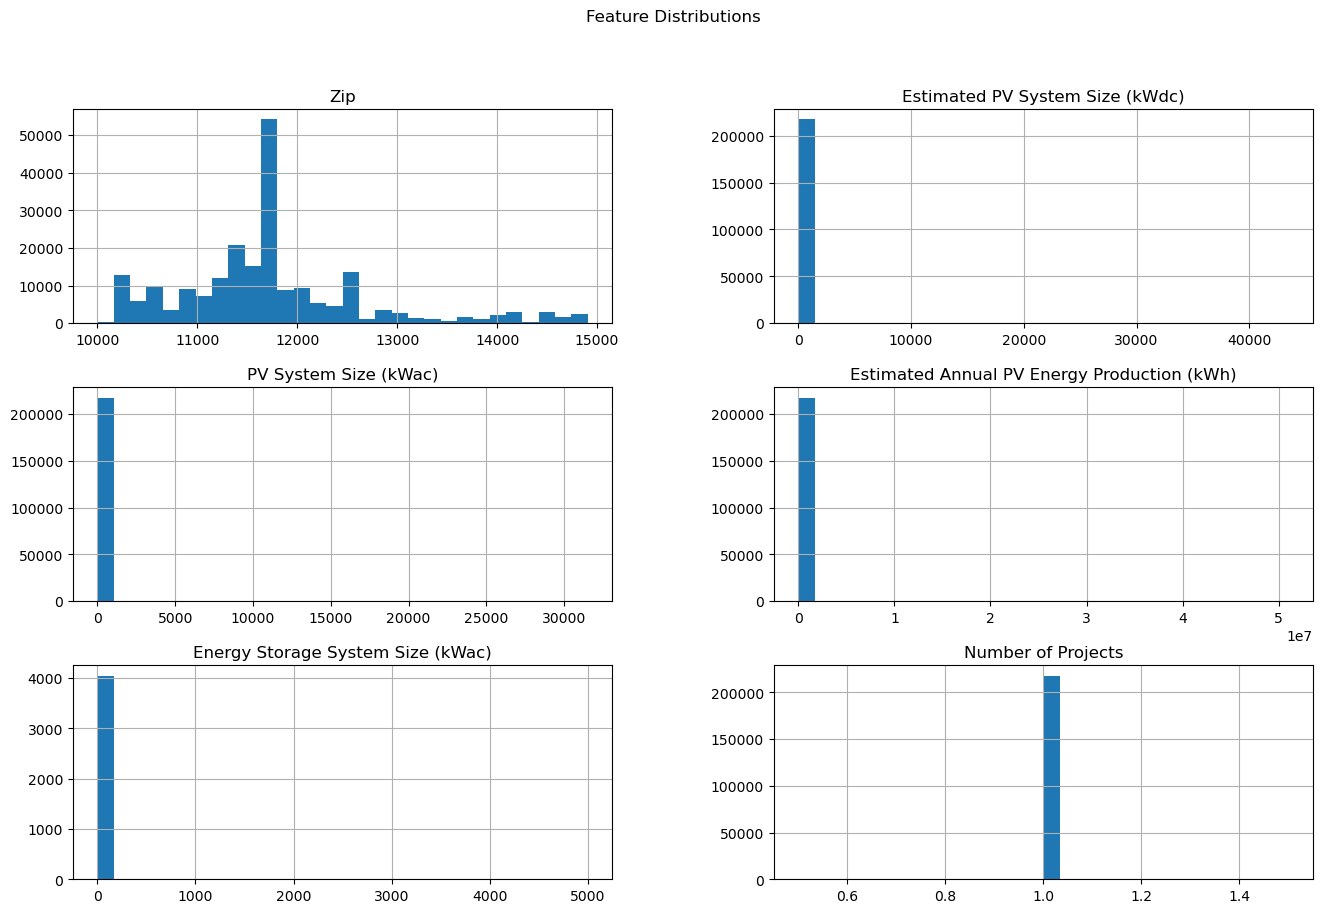

In [8]:
#1. Check Distribution of Features
df.hist(figsize=(16, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

In [9]:
# 2. Checking for missing values
def check_missing_values(df):
    print("Missing Values:\n")
    print(df.isnull().sum())
    print("\nPercentage of Missing Values:\n")
    print(df.isnull().mean() * 100)

check_missing_values(df)

Missing Values:

Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                96
Division                                        85234
Substation                                      79944
Circuit ID                                         30
Developer                                       10550
Metering Method                                   463
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              214024
Number of Projects                                  0
dtype: int64

Percentage of Missing Values:

Data Through Date   

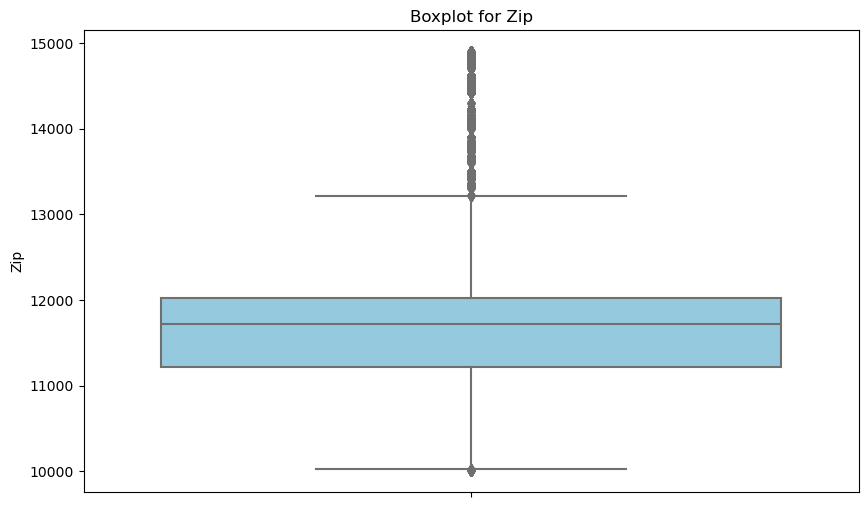

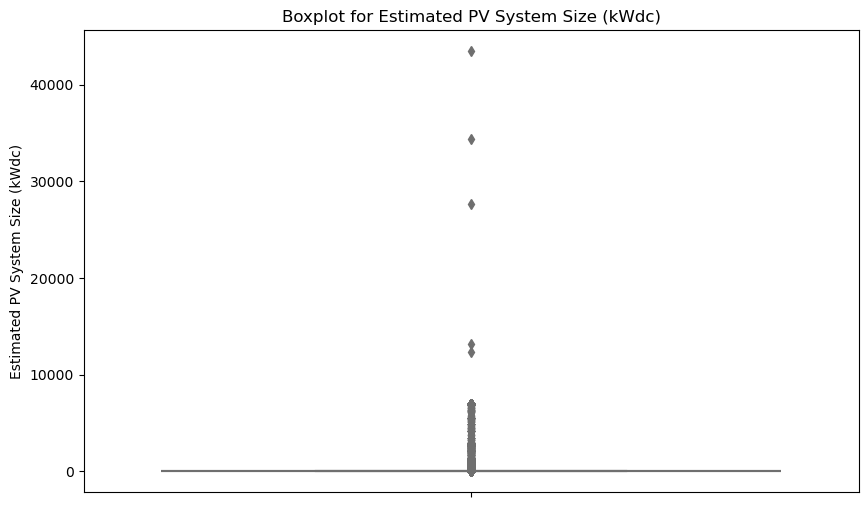

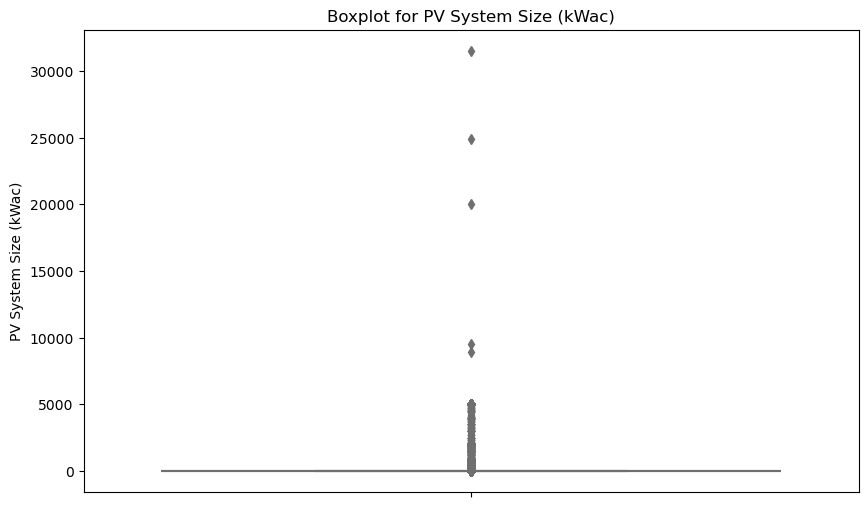

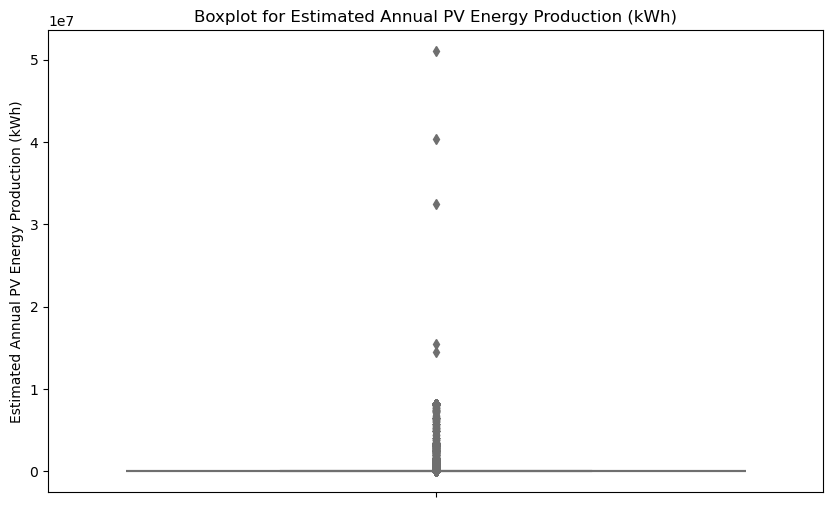

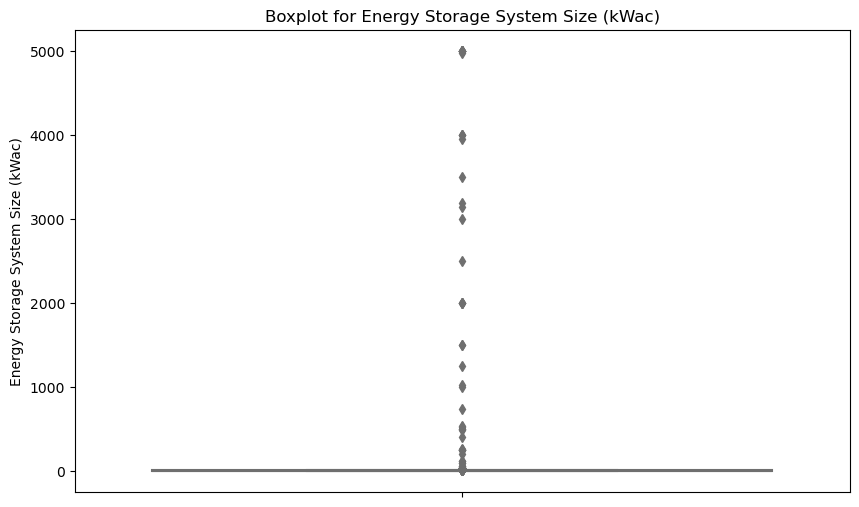

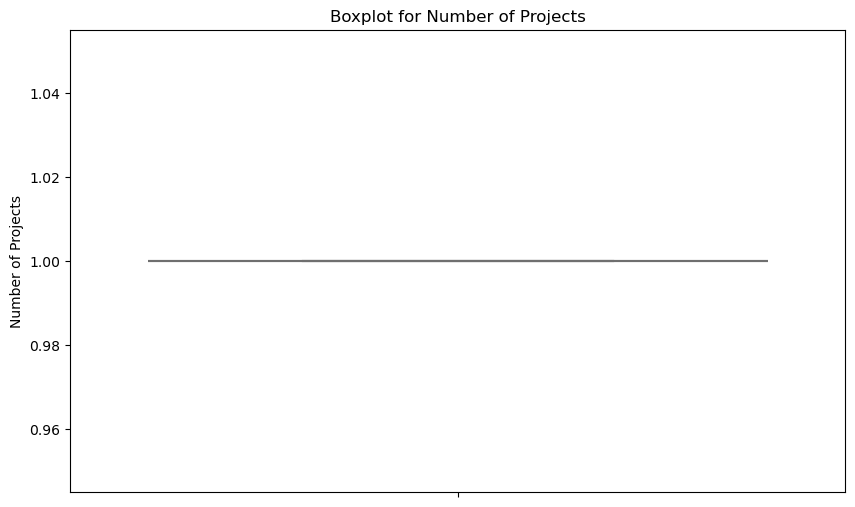


Outliers Summary:

Zip: 17010 outliers
Estimated PV System Size (kWdc): 12837 outliers
PV System Size (kWac): 12837 outliers
Estimated Annual PV Energy Production (kWh): 12837 outliers
Energy Storage System Size (kWac): 236 outliers
Number of Projects: 0 outliers


In [10]:
# 3.1 Visualizing outliers using boxplots
def plot_boxplots(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, y=col, color='skyblue')
        plt.title(f'Boxplot for {col}')
        plt.ylabel(col)
        plt.show()

# 3.2 Checking for outliers using the IQR method
def check_outliers(df):
    print("\nOutliers Summary:\n")
    numerical_cols  = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        q1          = df[col].quantile(0.25)
        q3          = df[col].quantile(0.75)
        iqr         = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers    = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers")
        
# Call the function
plot_boxplots(df)
check_outliers(df)

Handling Missing Values

In [11]:
# 1. Drop the column if it has 98% missing values
threshold          = 0.98
missing_percentage = df.isnull().mean()
columns_to_drop    = missing_percentage[missing_percentage > threshold].index

df = df.drop(columns=columns_to_drop)

print("dropped column:",columns_to_drop)

dropped column: Index(['Energy Storage System Size (kWac)'], dtype='object')


In [12]:
# Filling missing values based on the context for each column

# 2. Remove the data record which doesn't have Project ID.
df = df.dropna(subset=['Project ID'])

df['Zip']             = df['Zip'].fillna(df['Zip'].mode()[0])         # 3. Zip - Fill with the mode (most common value) as it's likely categorical
df['Division']        = df['Division'].fillna('Unknown Division')     # 4. Division - Fill with "Unknown Division" as a placeholder for missing entries
df['Substation']      = df['Substation'].fillna('Unknown Substation') # 5. Substation - Fill with "Unknown Substation"
df['Circuit ID']      = df['Circuit ID'].fillna('Unknown Circuit')    # 6. Circuit ID - Fill with "Unknown Circuit"
df['Developer']       = df['Developer'].fillna('Unknown Developer')   # 7. Developer - Fill with "Unknown Developer"
df['Metering Method'] = df['Metering Method'].fillna('Unknown')       # 8. Metering Method - Fill missing values with "Unknown" for undefined methods
df['City/Town']       = df['City/Town'].fillna('Unknown City')        # 9. City/Town - Fill missing cities with "Unknown City"


In [13]:
# Verify the missing values are handled
print(df.isnull().sum())

Data Through Date                              0
Project ID                                     0
Interconnection Date                           0
Utility                                        0
City/Town                                      0
County                                         0
Zip                                            0
Division                                       0
Substation                                     0
Circuit ID                                     0
Developer                                      0
Metering Method                                0
Estimated PV System Size (kWdc)                0
PV System Size (kWac)                          0
Estimated Annual PV Energy Production (kWh)    0
Number of Projects                             0
dtype: int64


Handling outliers

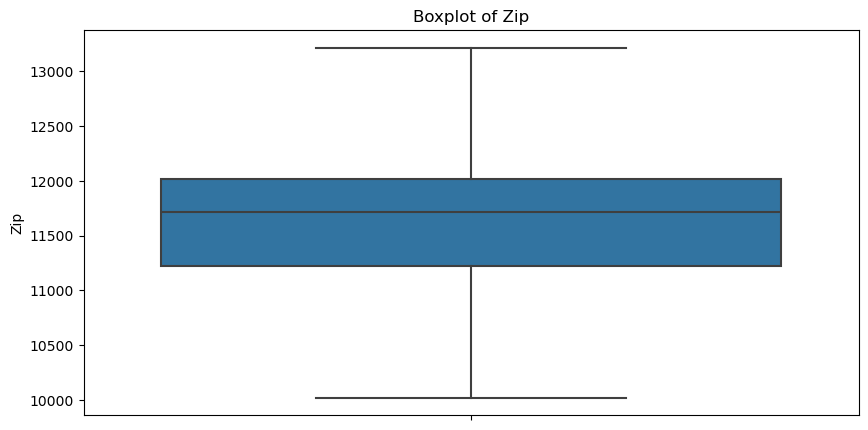

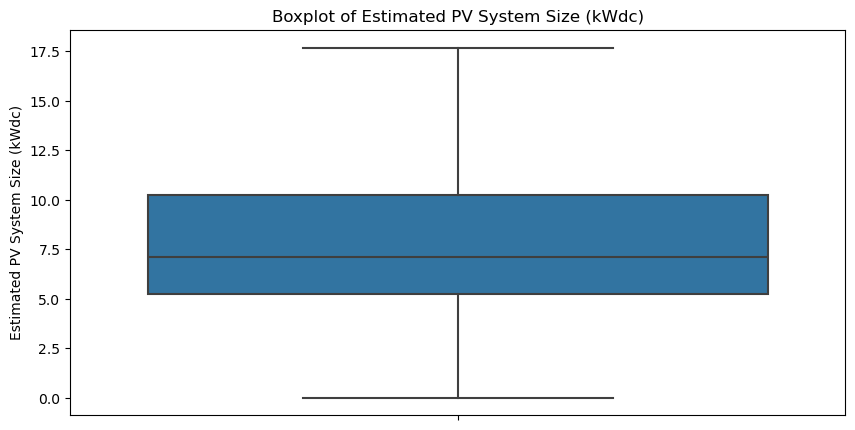

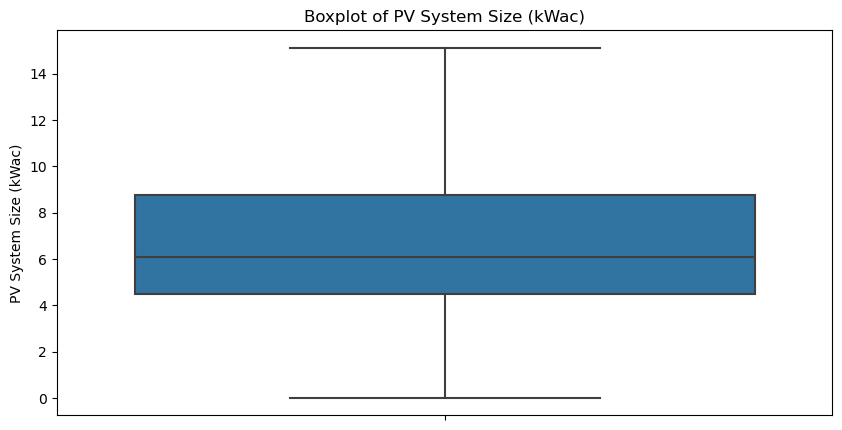

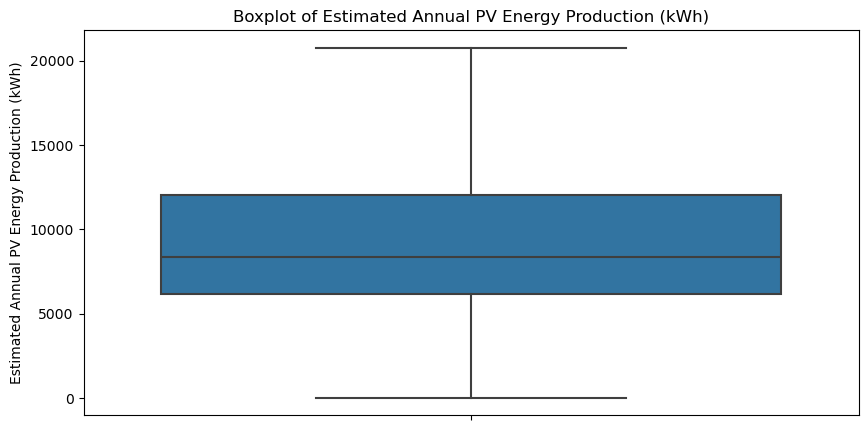

In [14]:
# List of numeric columns in the dataset
numeric_columns = ['Zip',
                   'Estimated PV System Size (kWdc)', 
                   'PV System Size (kWac)', 
                   'Estimated Annual PV Energy Production (kWh)'
                  ]

# Function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1                  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR   # Lower bound
    upper_bound = Q3 + 1.5 * IQR   # Upper bound
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Cap outliers for each numeric column
for column in numeric_columns:
    df = cap_outliers(df, column)

# Create boxplots to visualize outliers
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

Checking for duplicates

In [15]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows
# df = df.drop_duplicates()

Number of duplicate rows: 0


Handling Inconsistency for "City/Town" column and "Zip" column

In [16]:
# Convert text to title case
df['City/Town'] = df['City/Town'].str.title()

# Replace abbreviations or synonyms
df['City/Town'] = df['City/Town'].replace({'Ny': 'New York', 'Sf': 'San Francisco'})

# Remove leading/trailing whitespace
df['City/Town'] = df['City/Town'].str.strip()

# Remove special characters
df['City/Town'] = df['City/Town'].str.replace(r'[^\w\s]', '', regex=True)

In [17]:
# Convert columns to appropriate types
df['Zip']       = df['Zip'].astype(str)  # Convert Zip to string

In [18]:
# 2. Check for Low Variance Features
variance          = df.var(numeric_only=True)
low_variance_cols = variance[variance < 1e-5].index  # Adjust threshold if necessary
print("Low Variance Columns:\n", low_variance_cols)

Low Variance Columns:
 Index(['Number of Projects'], dtype='object')


Data Type Treatment

In [19]:
# Convert date columns to datetime format
df['Data Through Date']    = pd.to_datetime(df['Data Through Date'], errors='coerce')  # Change 'Date_Column' to your actual column name
df['Interconnection Date'] = pd.to_datetime(df['Interconnection Date'], errors='coerce')  # Change 'Date_Column' to your actual column name

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218112 entries, 0 to 218111
Data columns (total 16 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Data Through Date                            218112 non-null  datetime64[ns]
 1   Project ID                                   218112 non-null  object        
 2   Interconnection Date                         218112 non-null  datetime64[ns]
 3   Utility                                      218112 non-null  object        
 4   City/Town                                    218112 non-null  object        
 5   County                                       218112 non-null  object        
 6   Zip                                          218112 non-null  object        
 7   Division                                     218112 non-null  object        
 8   Substation                                   218112 non-null  object 

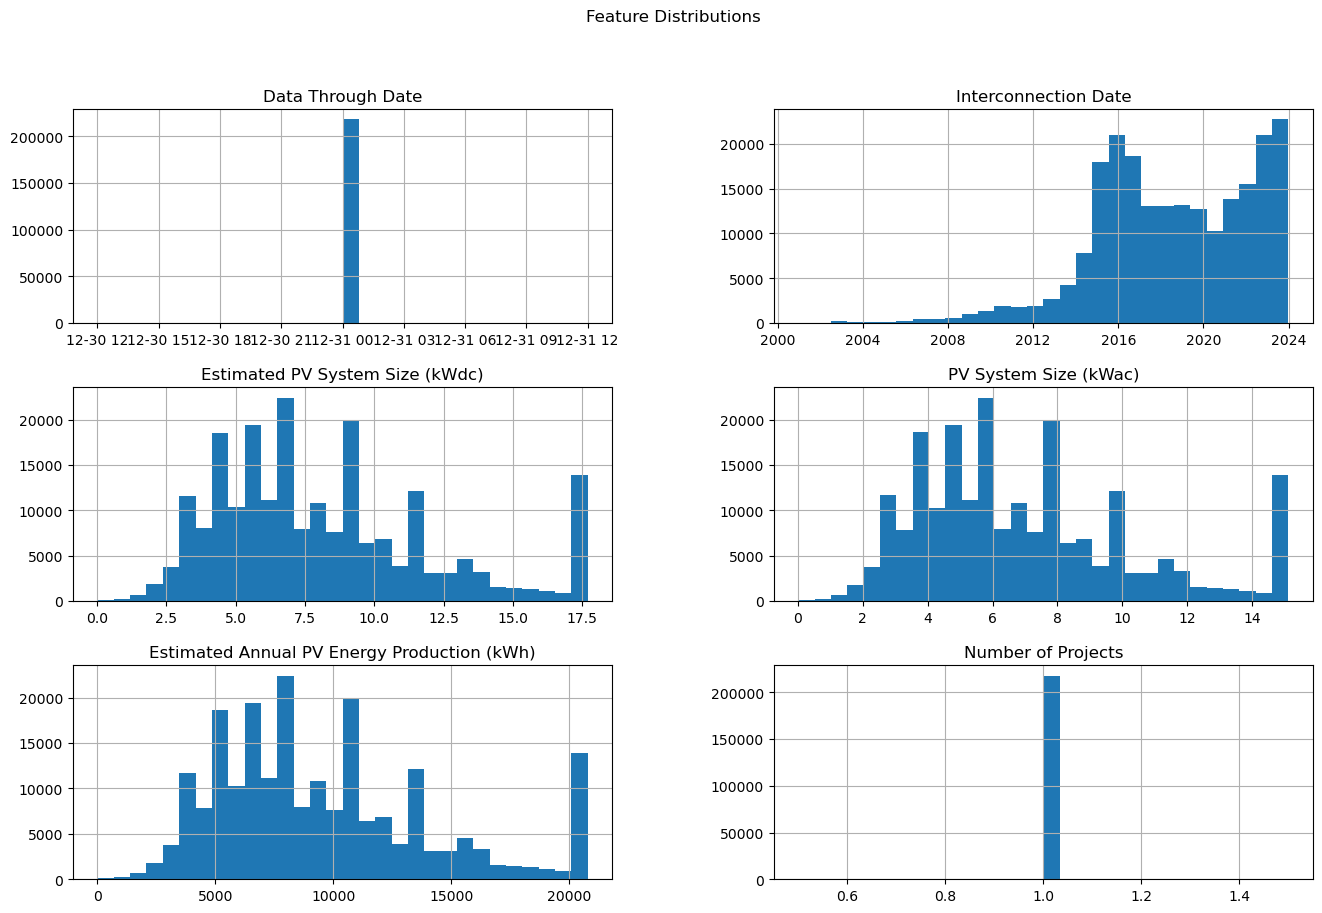

In [21]:
# Check Distribution of Features again
df.hist(figsize=(16, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

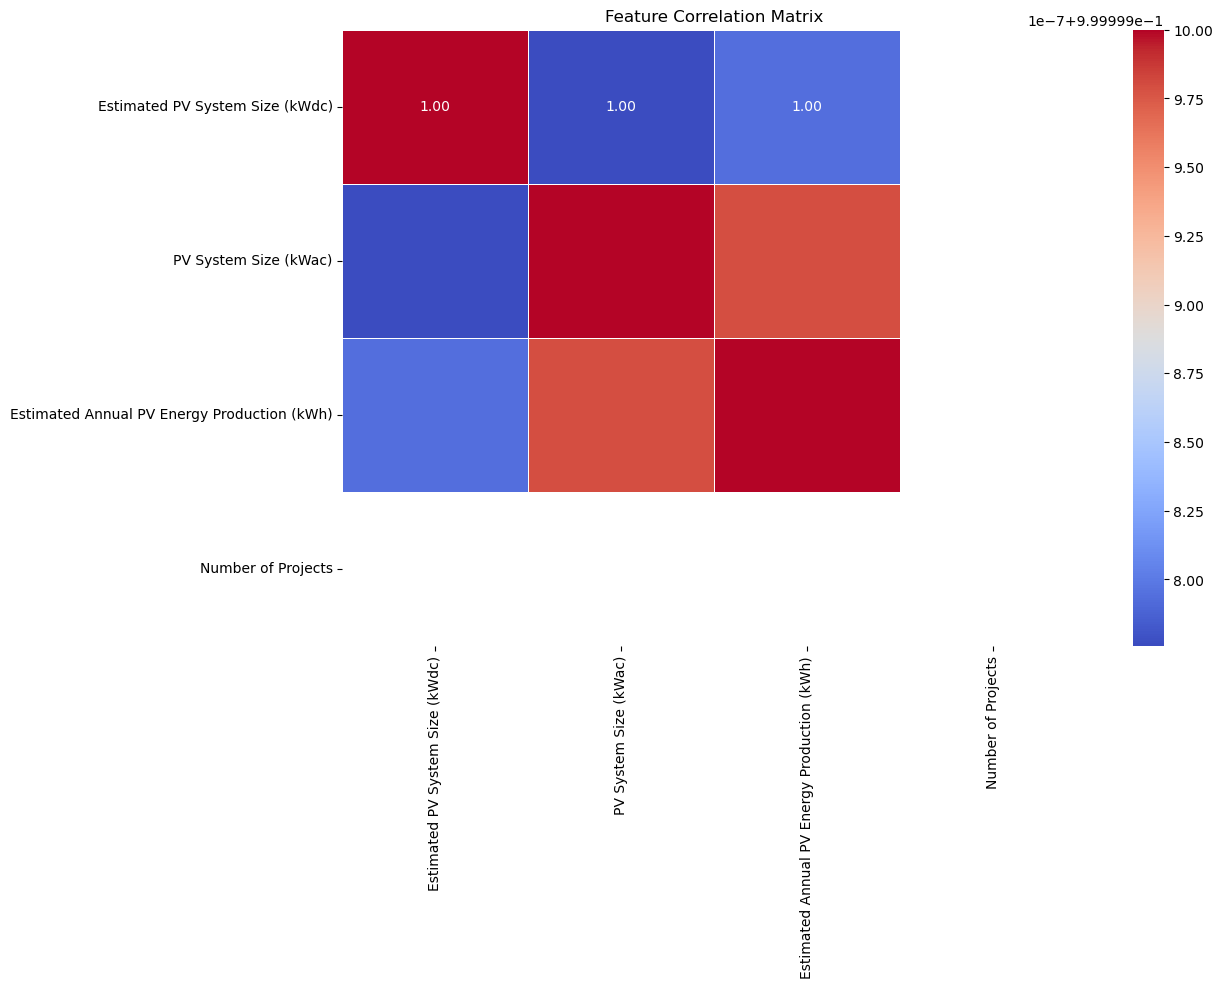

In [22]:
# Step 3: Compute correlation matrix
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [23]:
df.head(3)

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects
0,2023-12-31,SDG-66301,2023-12-29,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100.0,1
1,2023-12-31,SDG-66299,2023-12-29,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911.0,1
2,2023-12-31,SDG-66288,2023-12-29,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585.0,1


Categorical Features Treatment (Label Encoding) - # Convert categories to numeric values

In [24]:
categorical_cols = df.select_dtypes(include=['object']).columns  # Get categorical column names

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # Convert categories to numeric values

In [25]:
df.head(3)

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects
0,2023-12-31,218076,2023-12-29,1,1413,40,296,80,725,5873,1160,2,6.05,5.17,7100.0,1
1,2023-12-31,218075,2023-12-29,1,193,2,61,81,2025,4590,1160,2,6.74,5.76,7911.0,1
2,2023-12-31,218074,2023-12-29,1,196,23,247,80,718,3984,1827,2,3.05,2.61,3585.0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218112 entries, 0 to 218111
Data columns (total 16 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Data Through Date                            218112 non-null  datetime64[ns]
 1   Project ID                                   218112 non-null  int32         
 2   Interconnection Date                         218112 non-null  datetime64[ns]
 3   Utility                                      218112 non-null  int32         
 4   City/Town                                    218112 non-null  int32         
 5   County                                       218112 non-null  int32         
 6   Zip                                          218112 non-null  int32         
 7   Division                                     218112 non-null  int32         
 8   Substation                                   218112 non-null  int32  

In [27]:
unique_counts = df.nunique()
unique_counts

Data Through Date                                   1
Project ID                                     218077
Interconnection Date                             5409
Utility                                             7
City/Town                                        1907
County                                             62
Zip                                              1090
Division                                          110
Substation                                       2256
Circuit ID                                       6430
Developer                                        2568
Metering Method                                     7
Estimated PV System Size (kWdc)                  1494
PV System Size (kWac)                            1414
Estimated Annual PV Energy Production (kWh)      1996
Number of Projects                                  1
dtype: int64

Feature Engineering

In [28]:
# 1. Extract Date-Based Features : Helps capture seasonal patterns or yearly project trends.
df['Interconnection_Year']     = pd.to_datetime(df['Interconnection Date']).dt.year
df['Interconnection_Month']    = pd.to_datetime(df['Interconnection Date']).dt.month
df['Interconnection_Quarter']  = pd.to_datetime(df['Interconnection Date']).dt.quarter

# 2. Utility and Location Interactions : Combines categorical details into new levels for granular clustering or region analysis.
# df['Utility_City_Interaction'] = df['Utility'] + '_' + df['City/Town'].astype(str)
# Ensure columns are strings and handle missing values
df['Utility']   = df['Utility'].fillna('Unknown').astype(str)
df['City/Town'] = df['City/Town'].fillna('Unknown').astype(str)
df['County']    = df['County'].fillna('Unknown').astype(str)
 
# Combine Utility and City/Town into a single feature
df['Utility_City_Interaction'] = df['Utility'] + '_' + df['City/Town']


# 3. Geographic Groupings : Combines categorical details into new levels for granular clustering or region analysis.
df['County_City_Group']        = df['County'] + '_' + df['City/Town']

# 4. PV Efficiency Feature : Indicates system performance relative to size. High-efficiency values suggest better-designed systems.
df['PV_Efficiency']            = df['Estimated Annual PV Energy Production (kWh)'] / df['PV System Size (kWac)']

# Handle division by zero and infinities 
df['PV_Efficiency'].replace([np.inf, -np.inf], np.nan, inplace=True)

# 5. Load/Density Features : Represents project density, which could affect resource allocation for utilities.
project_count_per_division  = df.groupby('Division')['Project ID'].transform('count')
df['Projects_per_Division'] = project_count_per_division

# 6. Developer Importance : Tracks the significance of each developer, which may correlate with experience or reputation.
developer_project_count     = df.groupby('Developer')['Project ID'].transform('count')
df['Developer_Projects']    = developer_project_count

# Ensure no data leakage by checking newly generated features
df.head()

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,...,Estimated Annual PV Energy Production (kWh),Number of Projects,Interconnection_Year,Interconnection_Month,Interconnection_Quarter,Utility_City_Interaction,County_City_Group,PV_Efficiency,Projects_per_Division,Developer_Projects
0,2023-12-31,218076,2023-12-29,1,1413,40,296,80,725,5873,...,7100.0,1,2023,12,4,1_1413,40_1413,1373.307544,11982,2703
1,2023-12-31,218075,2023-12-29,1,193,2,61,81,2025,4590,...,7911.0,1,2023,12,4,1_193,2_193,1373.437500,5926,2703
2,2023-12-31,218074,2023-12-29,1,196,23,247,80,718,3984,...,3585.0,1,2023,12,4,1_196,23_196,1373.563218,11982,2530
3,2023-12-31,218073,2023-12-29,1,196,23,257,80,718,1568,...,6592.0,1,2023,12,4,1_196,23_196,1373.333333,11982,2703
4,2023-12-31,218072,2023-12-28,1,1616,40,291,83,948,5783,...,7100.0,1,2023,12,4,1_1616,40_1616,1373.307544,21813,2703


In [29]:
df.shape

(218112, 24)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218112 entries, 0 to 218111
Data columns (total 24 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Data Through Date                            218112 non-null  datetime64[ns]
 1   Project ID                                   218112 non-null  int32         
 2   Interconnection Date                         218112 non-null  datetime64[ns]
 3   Utility                                      218112 non-null  object        
 4   City/Town                                    218112 non-null  object        
 5   County                                       218112 non-null  object        
 6   Zip                                          218112 non-null  int32         
 7   Division                                     218112 non-null  int32         
 8   Substation                                   218112 non-null  int32  

In [31]:
# Set style for plots
sns.set_style("whitegrid")

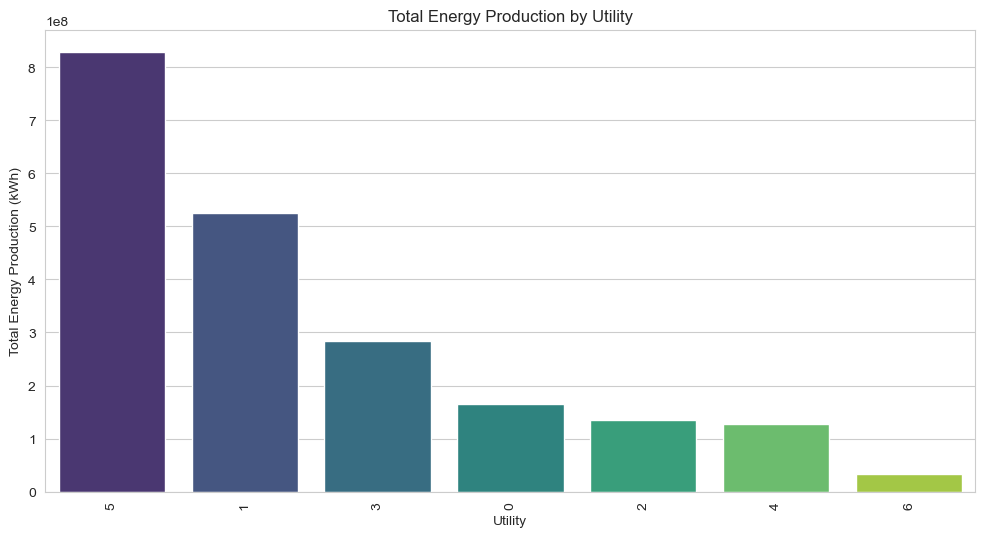

In [32]:
# --- 1. Distribution of Energy Production Across Regions ---

# Aggregate production by Utility
plt.figure(figsize=(12, 6))
utility_energy = df.groupby('Utility')['Estimated Annual PV Energy Production (kWh)'].sum().sort_values(ascending=False)
sns.barplot(x=utility_energy.index, y=utility_energy.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Total Energy Production by Utility")
plt.ylabel("Total Energy Production (kWh)")
plt.xlabel("Utility")
plt.show()

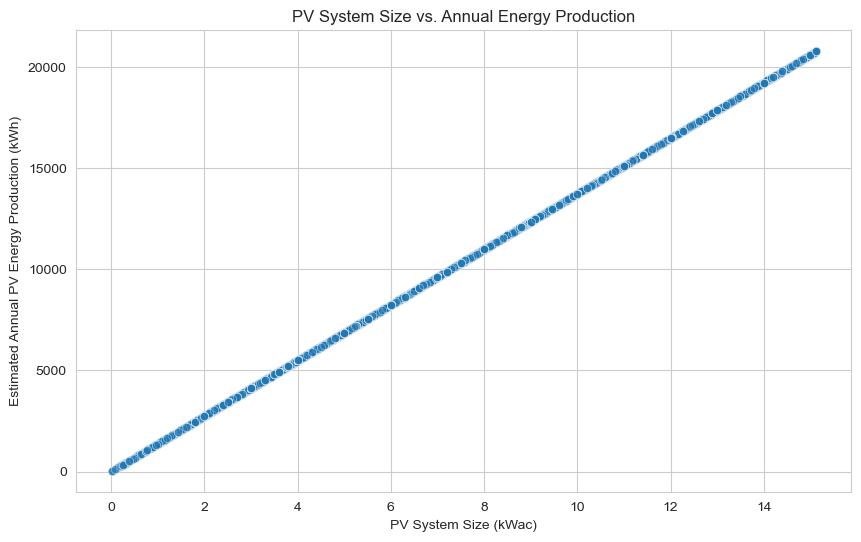

In [33]:
# --- 2. Relationship Between PV System Size and Energy Production ---

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PV System Size (kWac)'], y=df['Estimated Annual PV Energy Production (kWh)'], alpha=0.5)
plt.title("PV System Size vs. Annual Energy Production")
plt.xlabel("PV System Size (kWac)")
plt.ylabel("Estimated Annual PV Energy Production (kWh)")
plt.show()

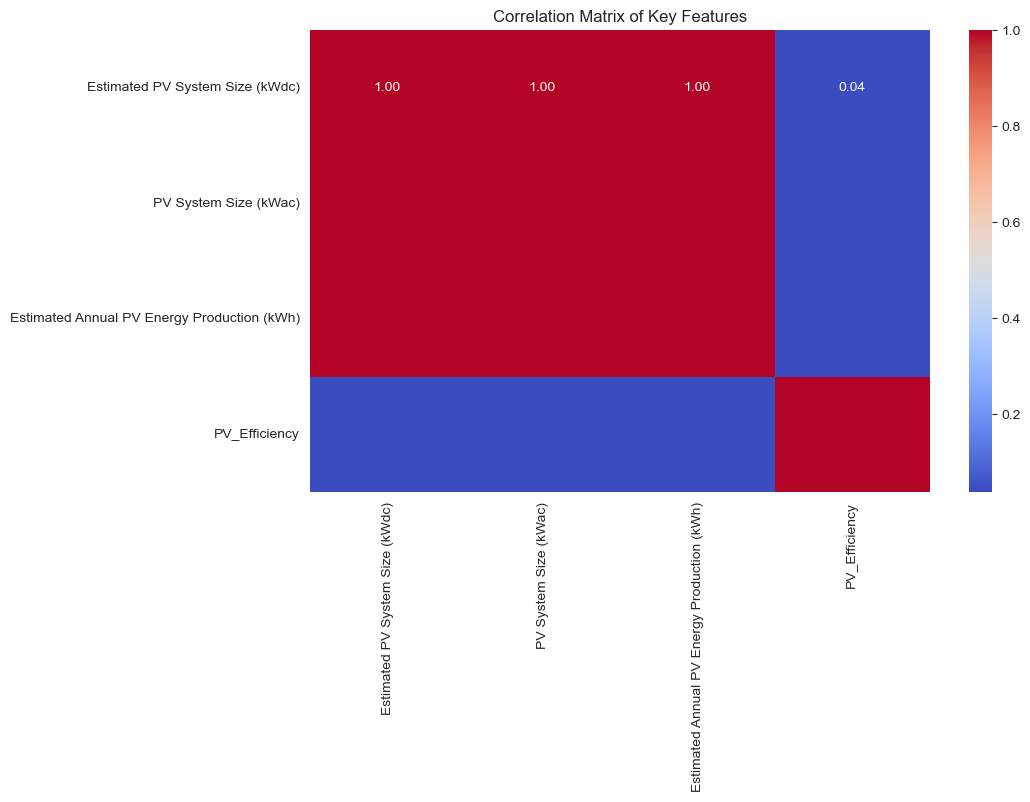

In [34]:
# Correlation Heatmap to identify relationships
plt.figure(figsize=(10, 6))
corr_matrix = df[['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 
                  'Estimated Annual PV Energy Production (kWh)', 'PV_Efficiency']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Key Features")
plt.show()

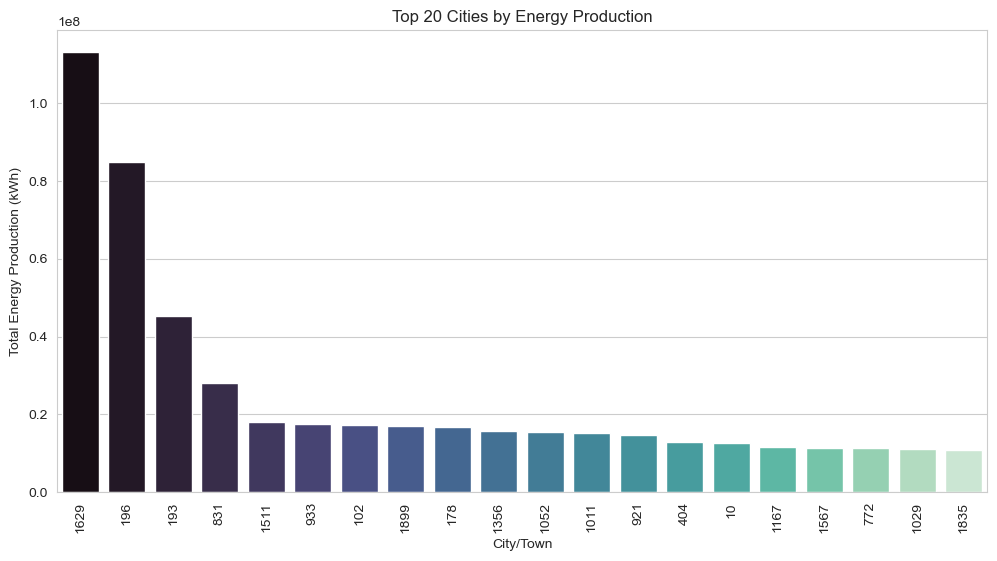

In [35]:
# --- 3. Patterns in Geographical Data ---

# Aggregate production by City
top_cities = df.groupby('City/Town')['Estimated Annual PV Energy Production (kWh)'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="mako")
plt.xticks(rotation=90)
plt.title("Top 20 Cities by Energy Production")
plt.ylabel("Total Energy Production (kWh)")
plt.xlabel("City/Town")
plt.show()

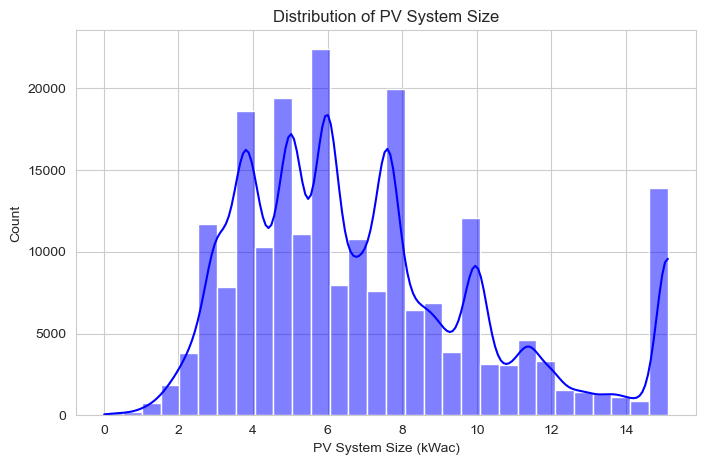

In [36]:
# --- 4. Dataset Visualizations: Histograms, Boxplots, and Scatterplots ---

# Histogram of PV System Size
plt.figure(figsize=(8, 5))
sns.histplot(df['PV System Size (kWac)'], bins=30, kde=True, color='blue')
plt.title("Distribution of PV System Size")
plt.xlabel("PV System Size (kWac)")
plt.ylabel("Count")
plt.show()

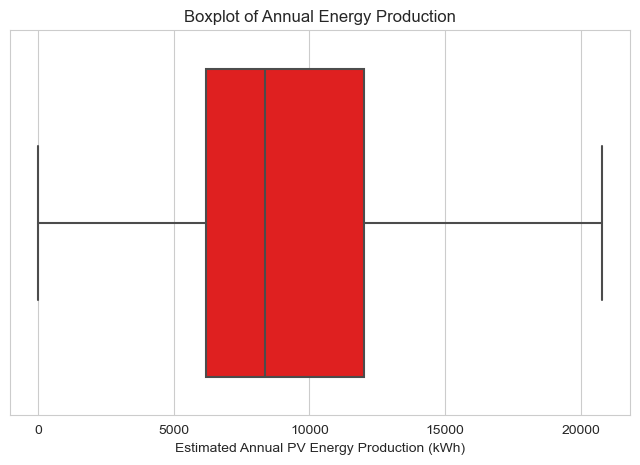

In [37]:
# Boxplot of Energy Production (Detecting Outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Estimated Annual PV Energy Production (kWh)'], color='red')
plt.title("Boxplot of Annual Energy Production")
plt.show()

Features Most Correlated with Energy Production:
 PV System Size (kWac)              1.000000
Estimated PV System Size (kWdc)    1.000000
Zip                                0.182317
Utility                            0.084283
Substation                         0.064777
Utility_City_Interaction           0.059759
County                             0.047318
Interconnection Date               0.043772
Interconnection_Year               0.042799
PV_Efficiency                      0.037231
City/Town                          0.034251
County_City_Group                  0.027175
Metering Method                    0.026045
Interconnection_Month              0.011289
Interconnection_Quarter            0.009138
Division                          -0.012582
Projects_per_Division             -0.014088
Circuit ID                        -0.058964
Developer                         -0.121432
Project ID                        -0.215907
Developer_Projects                -0.243826
Data Through Date         

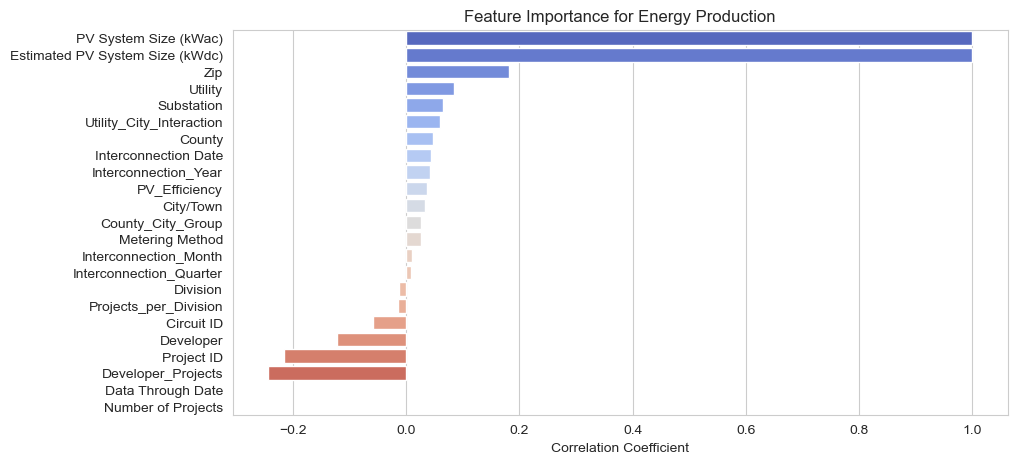

In [38]:
# --- 5. Feature Importance for Energy Production ---

# Correlation with Energy Production
feature_correlation = df.corr()['Estimated Annual PV Energy Production (kWh)'].drop('Estimated Annual PV Energy Production (kWh)').sort_values(ascending=False)
print("Features Most Correlated with Energy Production:\n", feature_correlation)

# Top Correlated Features Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_correlation.values, y=feature_correlation.index, palette="coolwarm")
plt.title("Feature Importance for Energy Production")
plt.xlabel("Correlation Coefficient")
plt.show()

In [39]:
print(df.columns)
print(df.isna().sum)
print(df.shape)
print(df.info)

Index(['Data Through Date', 'Project ID', 'Interconnection Date', 'Utility',
       'City/Town', 'County', 'Zip', 'Division', 'Substation', 'Circuit ID',
       'Developer', 'Metering Method', 'Estimated PV System Size (kWdc)',
       'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)',
       'Number of Projects', 'Interconnection_Year', 'Interconnection_Month',
       'Interconnection_Quarter', 'Utility_City_Interaction',
       'County_City_Group', 'PV_Efficiency', 'Projects_per_Division',
       'Developer_Projects'],
      dtype='object')
<bound method DataFrame.sum of         Data Through Date  Project ID  Interconnection Date  Utility  \
0                   False       False                 False    False   
1                   False       False                 False    False   
2                   False       False                 False    False   
3                   False       False                 False    False   
4                   False       False   

<h1>Clustering Algorithm Selection</h1>

We will evaluate the following clustering techniques:

    1. K-Means Clustering
        - Assumes well-separated clusters.
        - Suitable for large datasets.
        - Requires choosing the optimal number of clusters (K).

    2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
        - Identifies clusters of arbitrary shapes.
        - Good for datasets with varying densities.
        - Handles outliers well.

    3. Hierarchical Clustering
        - Creates a tree structure (dendrogram).
        - Useful for visualizing cluster relationships.

<h1> Model Training</h1>

📌 Implementation Steps:

    Step 1: Prepare the dataset for clustering (select relevant features).
    Step 2: Determine the optimal number of clusters for K-Means (Elbow & Silhouette Method).
    Step 3: Train the K-Means model and assign clusters.
    Step 4: Evaluate clustering quality using metrics like Silhouette Score & Davies-Bouldin Index.

In [40]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [41]:
df.columns

Index(['Data Through Date', 'Project ID', 'Interconnection Date', 'Utility',
       'City/Town', 'County', 'Zip', 'Division', 'Substation', 'Circuit ID',
       'Developer', 'Metering Method', 'Estimated PV System Size (kWdc)',
       'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)',
       'Number of Projects', 'Interconnection_Year', 'Interconnection_Month',
       'Interconnection_Quarter', 'Utility_City_Interaction',
       'County_City_Group', 'PV_Efficiency', 'Projects_per_Division',
       'Developer_Projects'],
      dtype='object')

In [42]:
# --- Step 1: Select Relevant Features for Clustering ---
features = ['PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)', 'PV_Efficiency']
X        = df[features]

In [43]:
# Standardize the features for better clustering performance
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
X_scaled

array([[-0.54655173, -0.54662454, -0.31716988],
       [-0.37143991, -0.37136234,  0.29163329],
       [-1.30635892, -1.30623813,  0.88058242],
       ...,
       [-1.48740673, -1.48733519,  0.58442515],
       [-1.36868686, -1.36869284, -0.19635313],
       [-1.33900689, -1.33908628, -0.82097575]])

In [45]:
from sklearn.decomposition import PCA

# Reduce Dimensionality for Visualization
pca       = PCA(n_components=3)  # Reduce to 5 principal components
X_reduced = pca.fit_transform(X_scaled)  # Assuming data is scaled

In [46]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=3, batch_size=1000, random_state=42)
kmeans.fit(X_scaled)

MiniBatchKMeans(batch_size=1000, n_clusters=3, random_state=42)

In [47]:
from sklearn.utils import shuffle

X_sampled = shuffle(X_scaled, random_state=42)[:5000]  # Use only 5,000 samples

In [48]:
# K-Means Clustering
kmeans        = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_sampled)
print("K-Means Silhouette Score:", silhouette_score(X_sampled, kmeans_labels))

K-Means Silhouette Score: 0.5032247041705219


In [49]:
# DBSCAN Clustering
dbscan        = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_sampled)
print("DBSCAN Silhouette Score:", silhouette_score(X_sampled, dbscan_labels) if len(set(dbscan_labels)) > 1 else "N/A")

DBSCAN Silhouette Score: 0.6279916456800937


In [50]:
# Hierarchical Clustering
hierarchical        = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_sampled)
print("Hierarchical Clustering Silhouette Score:", silhouette_score(X_sampled, hierarchical_labels))

Hierarchical Clustering Silhouette Score: 0.46157804278971837


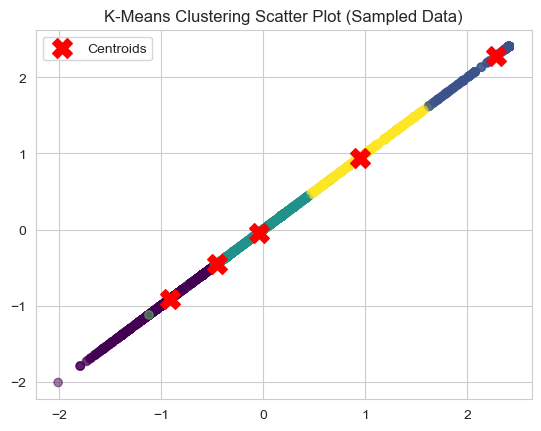

In [51]:
plt.scatter(X_sampled[:, 0], X_sampled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.legend()
plt.title("K-Means Clustering Scatter Plot (Sampled Data)")
plt.show()

- DBSCAN has the highest Silhouette Score: 0.6279, indicating better clustering quality than K-Means (0.5032) and Hierarchical Clustering (0.4615).
- A higher Silhouette Score (closer to 1) means the clusters are well-separated and dense.